In [11]:
#Import all the required packages
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Read the csv file into a panda data frame
diamond_df = pd.read_csv("diamonds.csv")

#Displaying the data once to have a look the the data set
diamond_df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [13]:
#Get the information of datatypes of all the columns
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [14]:
#Lets get the count of each value of the following columns: clarity, cut, & color

In [15]:
#Count of values for the clarity of the diamond
diamond_df["clarity"].value_counts().to_frame()

,clarity
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


In [16]:
#Count of values for the cut of the diamond
diamond_df["cut"].value_counts().to_frame()

,cut
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


In [17]:
#Count of values for the color of the diamond
diamond_df["color"].value_counts().to_frame()

,color
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


In [18]:
#Drop the column"Unnamed"
diamond_df = diamond_df.drop("Unnamed: 0",axis = 1)

In [19]:
#Conver the data type of the column of price to float
diamond_df["price"] = diamond_df["price"].astype("float64")
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [20]:
#Get the min, max, mean, std etc for the diamond data frame
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Identify different features/attributes of the dataset by plotting histogram

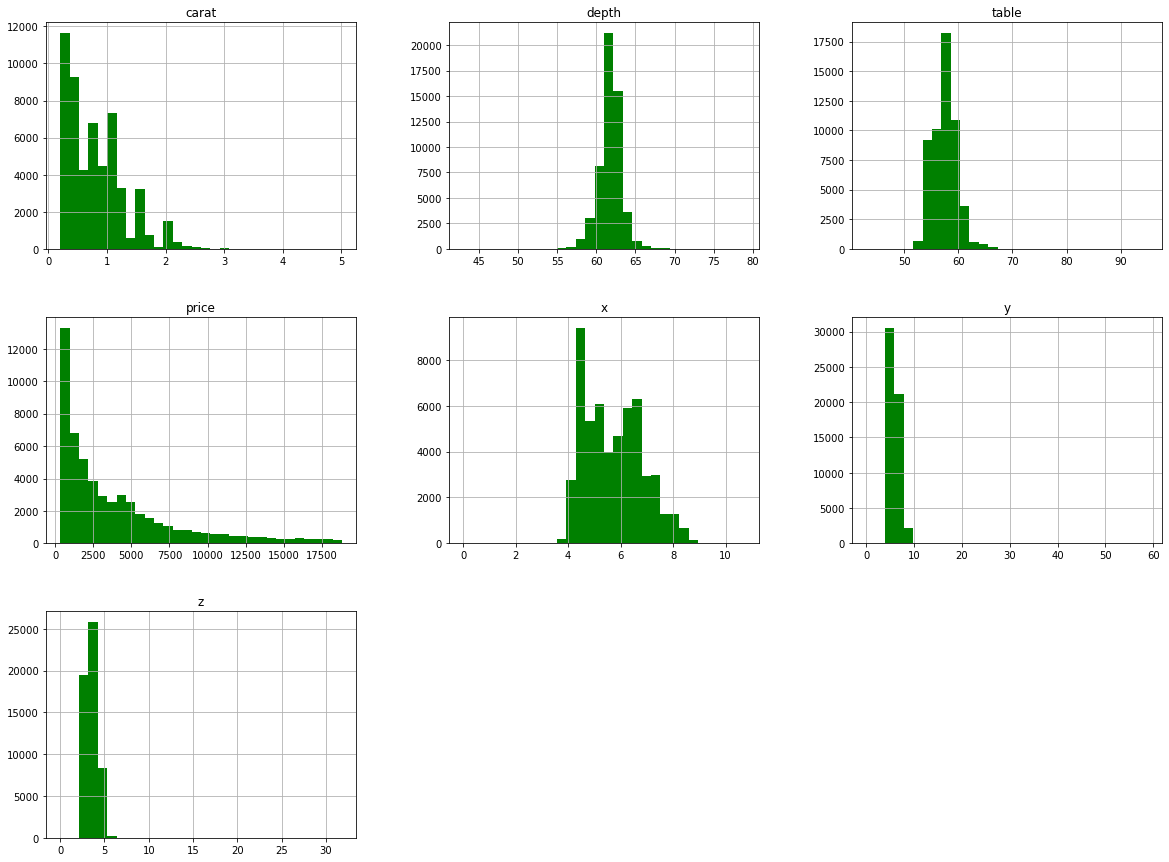

In [21]:
#Identify different features & attributes of the diamond dataset.

#Plotting histogram for different features. 
diamond_df.hist(bins = 30, figsize = (20,15),color='green')

#Display the plot.
plt.show()

## Understanding Correlation between Features

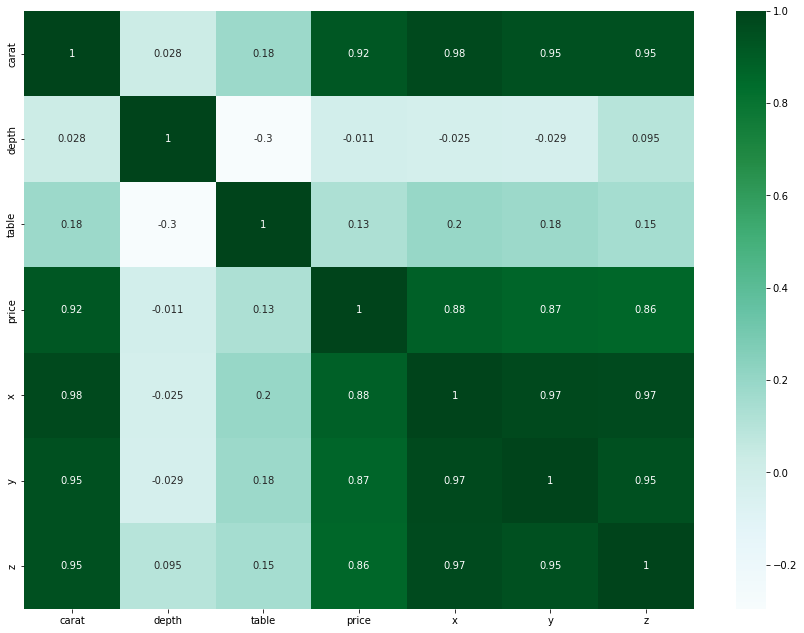

In [22]:
#correlation of all the features of the dataset
correlation_matrix = diamond_df.corr()

#Plotting the heatmap
plt.subplots(figsize = (15,11))
sns.heatmap(correlation_matrix, annot = True, cmap = "BuGn")

#Display the plot 
plt.show()

## Split the Data into Test and Train Set using Stratified sampling

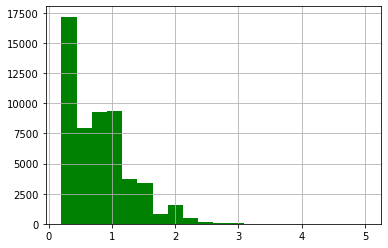

In [23]:
#have a look at the data 
diamond_df["carat"].hist(bins = 20,color='green')

#Display the plot
plt.show()

In [24]:
#Limit the number of carat strata by dividing it by 0.4 
diamond_df["carat_categories"] = np.ceil(diamond_df["carat"]/0.4)

#Divide the carat into 5 categories
diamond_df["carat_categories"].where(diamond_df["carat_categories"] < 5, 5.0, inplace = True)

In [25]:
#display the count of values into a single category
diamond_df["carat_categories"].value_counts().to_frame()

,carat_categories
2.0,17020
1.0,14391
3.0,13374
4.0,5907
5.0,3248


In [33]:
#Split the data into train and test datasets using sklearns Stratified Shuffle Split Class
from sklearn.model_selection import StratifiedShuffleSplit

#Split the data into 80:20 ratio
Strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

#for loop
for train_index,test_index in Strat_split.split(diamond_df,diamond_df["carat_categories"]):
    train_dataset = diamond_df.loc[train_index]
    test_dataset = diamond_df.loc[test_index]

In [34]:
#train dataset
train_dataset["carat_categories"].value_counts() / len(train_dataset)

2.0    0.315536
1.0    0.266801
3.0    0.247938
4.0    0.109520
5.0    0.060206
Name: carat_categories, dtype: float64

In [35]:
#test dataset
test_dataset["carat_categories"].value_counts() / len(test_dataset)

2.0    0.315536
1.0    0.266778
3.0    0.247961
4.0    0.109473
5.0    0.060252
Name: carat_categories, dtype: float64

In [36]:
#Droping the carat categories column
for x in (test_dataset, train_dataset):
    x.drop("carat_categories", axis=1,inplace = True)

In [37]:
#Describe the test dataset
test_dataset.describe()

,carat,depth,table,price,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.797741,61.729329,57.480580,3956.750649,5.730093,5.734634,3.536117
std,0.474259,1.430505,2.242666,4045.204490,1.123129,1.142879,0.697210
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,954.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2395.500000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5348.000000,6.530000,6.530000,4.030000
max,5.010000,71.800000,73.000000,18804.000000,10.740000,31.800000,6.980000


In [38]:
#Describe the train dataset
train_dataset.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797989,61.754424,57.451335,3926.811990,5.731423,5.734499,3.539388
std,0.473955,1.433123,2.232430,3975.401149,1.121431,1.141962,0.707812
min,0.200000,43.000000,44.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2403.000000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5320.000000,6.540000,6.540000,4.040000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,31.800000


## Data Visualisation

In [39]:
#Creating a copy of the existing dataset
diamond_df = train_dataset.copy()

Try different kind of plots to check the best way to visualize the diamond dataset

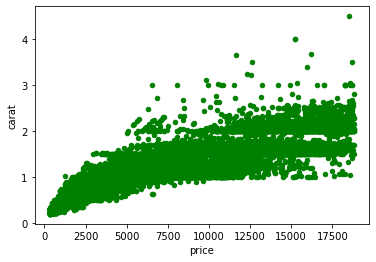

In [40]:
#Plot scatter plot between price & carat
diamond_df.plot(kind="scatter", x="price", y="carat",alpha = 1.0, color='green')

#Display the plot
plt.show()

## Count plots for different categorical features of the diamond

C:\Users\sgurra2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diamonds Clarity')

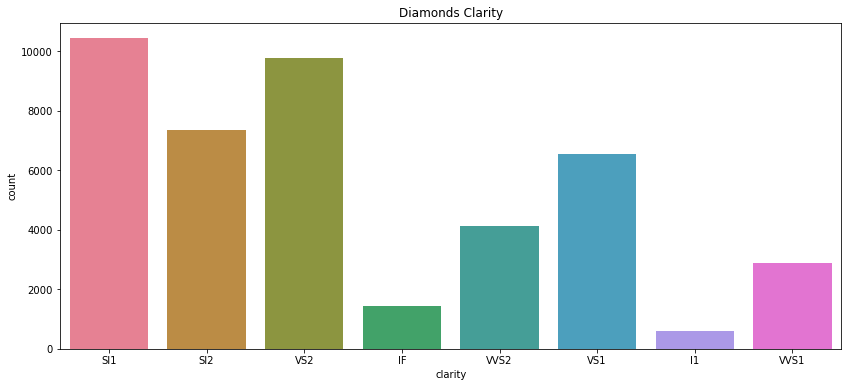

In [41]:
#Count plot for the clarity of the diamond
fig, ax = plt.subplots(1, figsize = (14,6))
sns.countplot('clarity',data = diamond_df,palette="husl")
ax.set_title("Diamonds Clarity")

C:\Users\sgurra2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diamonds Cut')

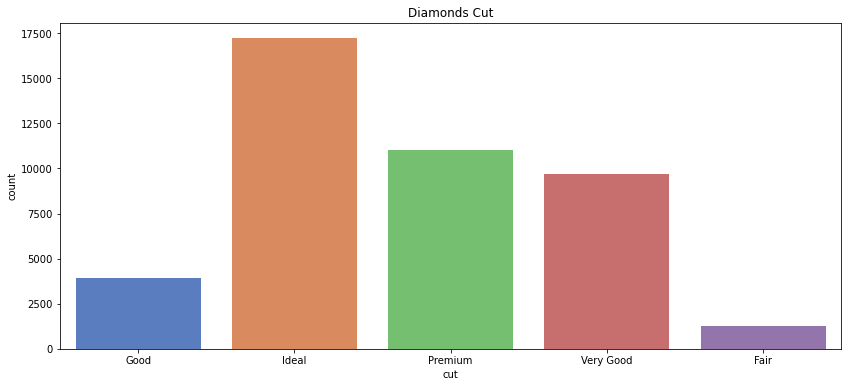

In [42]:
#Count plot for the cut of the diamond
fig, ax = plt.subplots(1, figsize = (14,6))
sns.countplot('cut',data = diamond_df,palette="muted")
ax.set_title("Diamonds Cut")

C:\Users\sgurra2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diamonds Color')

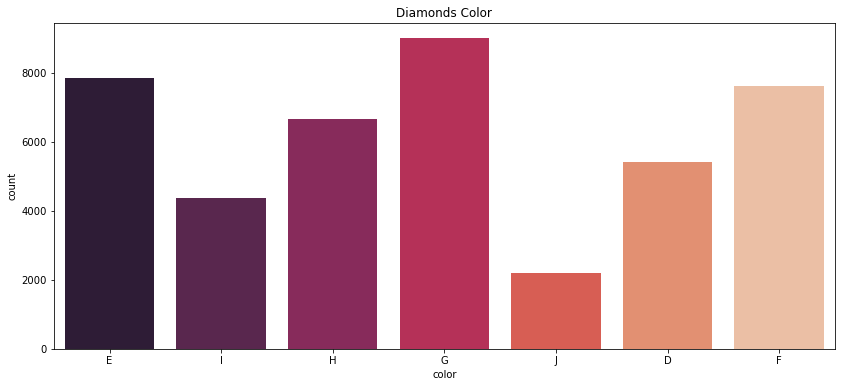

In [43]:
#Count plot for the cut of the diamond
fig, ax = plt.subplots(1, figsize = (14,6))
sns.countplot('color',data = diamond_df,palette="rocket")
ax.set_title("Diamonds Color")

### Compare the diamong weight with price according to the diamond cut

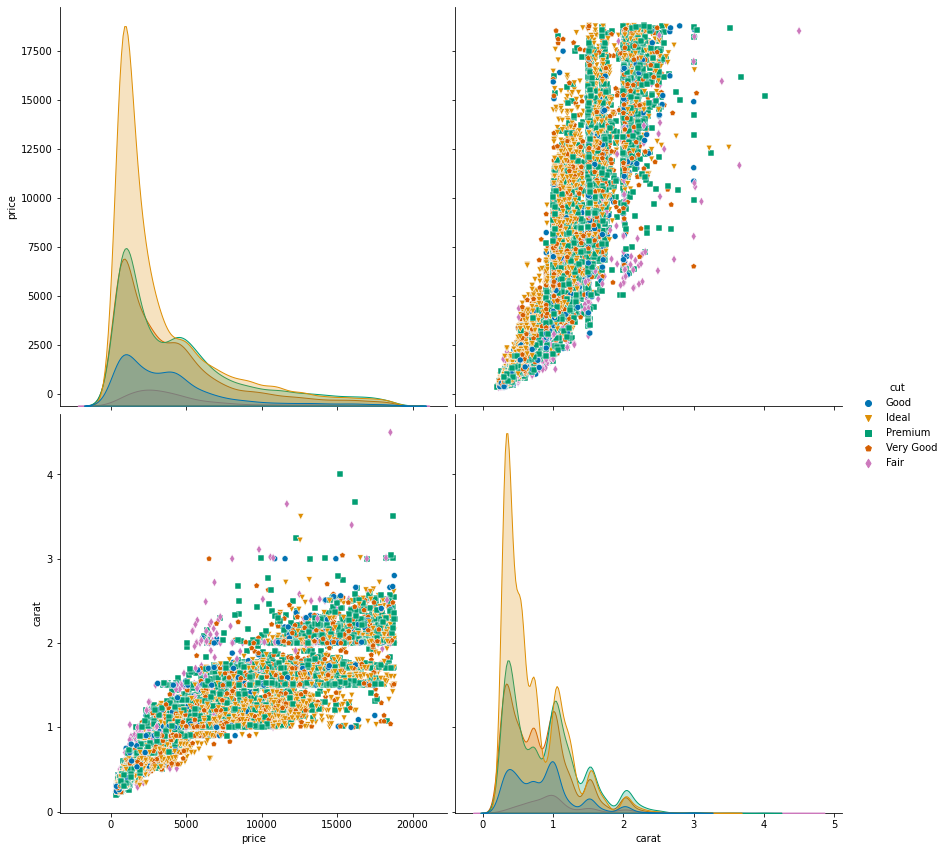

In [44]:
#Plot pairplot to understand the relationships between the features of the diamond based on the diamond cut
sns.pairplot(diamond_df[["price","cut","carat"]], markers = ["o","v","s","p","d"],hue="cut", height=6, palette='colorblind')

#Display the plot
plt.show()

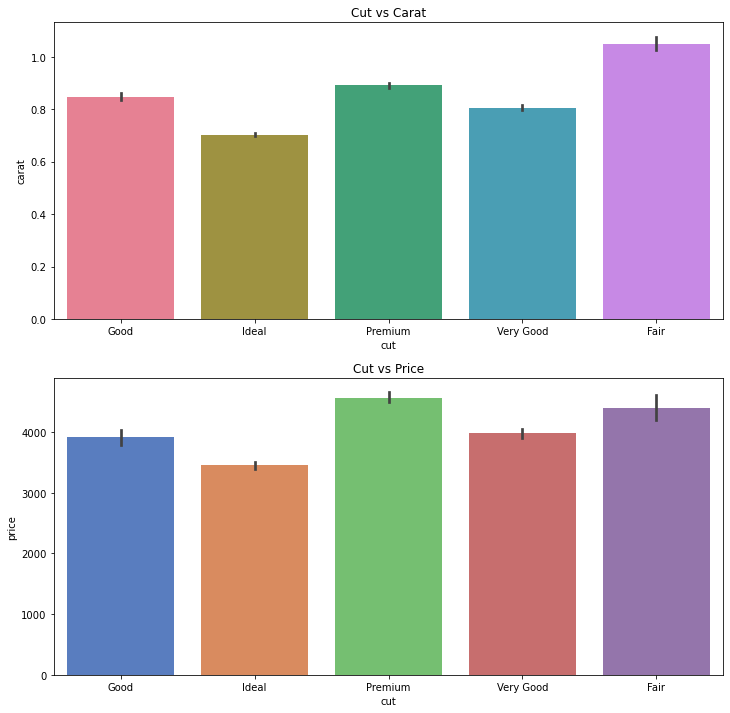

In [46]:
f, ax = plt.subplots(2,figsize = (12,12))

#Plotting the barplot to understand the relation b/w cut and the carat of the diamond
sns.barplot(x="cut",y="carat",data = diamond_df, ax=ax[0], palette="husl")
ax[0].set_title("Cut vs Carat")

#Plottig the barplot to understand the relation b/w cut and the price of the diamond
sns.barplot(x="cut",y="price",data = diamond_df,ax=ax[1], palette="muted")
ax[1].set_title("Cut vs Price")

#Display the plot
plt.show()

### Compare the diamond weight with price based on the diamond color

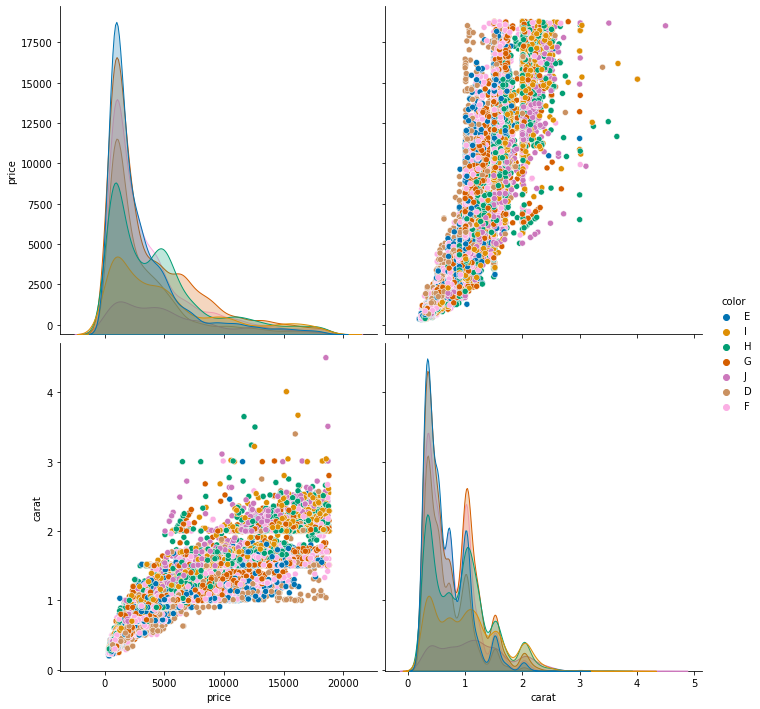

In [47]:
#Plot pairplot to understand the relationships between the features of the diamond based on the diamond color
sns.pairplot(diamond_df[["price","carat","color"]], hue="color", height=5, palette="colorblind")

#Display the plot
plt.show()

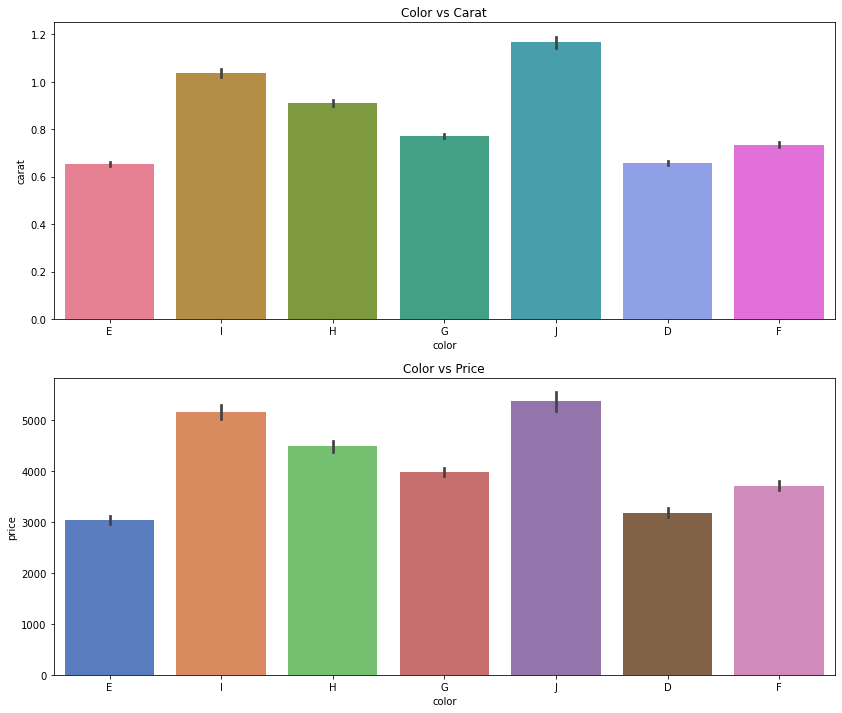

In [48]:
f, ax = plt.subplots(2,figsize = (14,12))

#Plotting the barplot to understand the relation between color & the carat of the diamond
sns.barplot(x="color",y="carat",data = diamond_df, ax=ax[0], palette="husl")
ax[0].set_title("Color vs Carat")

#Plotting the barplot to understand the relation between color & the price of the diamond
sns.barplot(x="color",y="price",data = diamond_df,ax=ax[1], palette="muted")
ax[1].set_title("Color vs Price")

#Display the plot
plt.show()

### Compare diamond weight with price based on diamond clarity

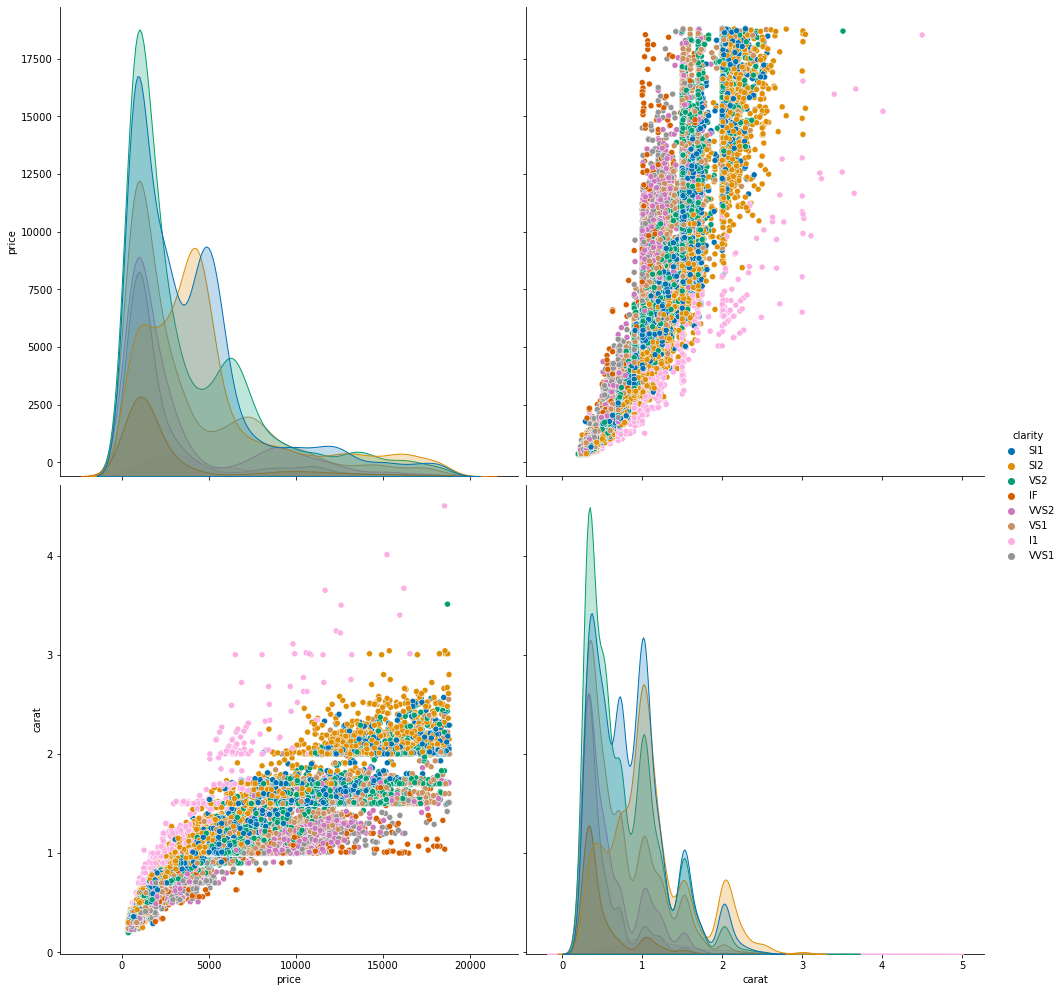

In [49]:
#Plot pairplot to understand the relationships between the features of the diamond based on the diamond cut
sns.pairplot(diamond_df[["price","carat","clarity"]],hue="clarity", height=7, palette="colorblind")

#Display the plot
plt.show()

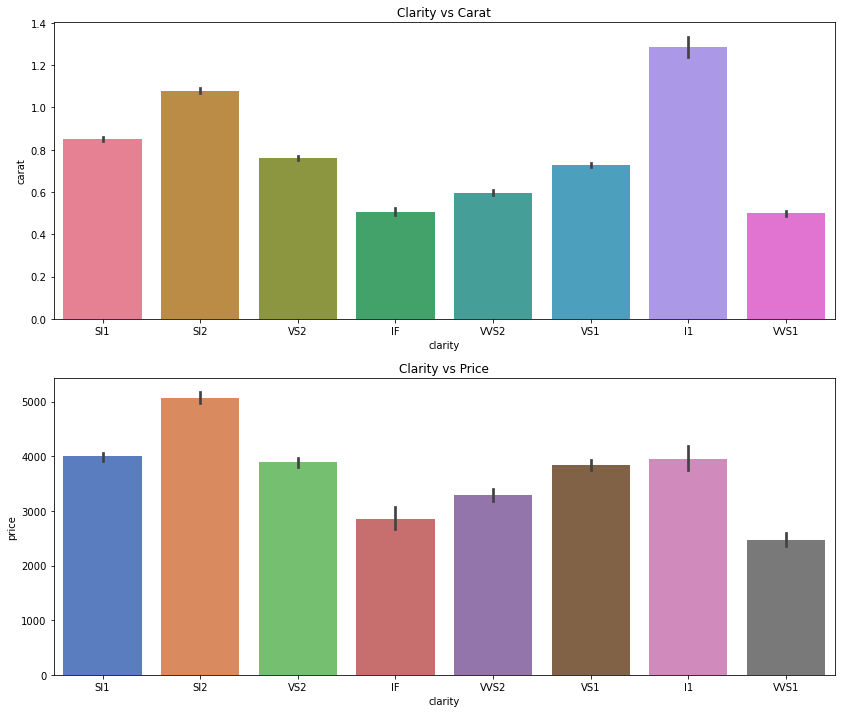

In [51]:
f, ax = plt.subplots(2,figsize = (14,12))

#Plotting barplot to understand the relation b/w diamond clarity with its carat
sns.barplot(x="clarity",y="carat",data = diamond_df, ax=ax[0],  palette="husl")
ax[0].set_title("Clarity vs Carat")

#Plotting barplot to understand the relation b/w diamond clarity with its price
sns.barplot(x="clarity",y="price",data = diamond_df,ax=ax[1],  palette="muted")
ax[1].set_title("Clarity vs Price")

#Display the plot
plt.show()

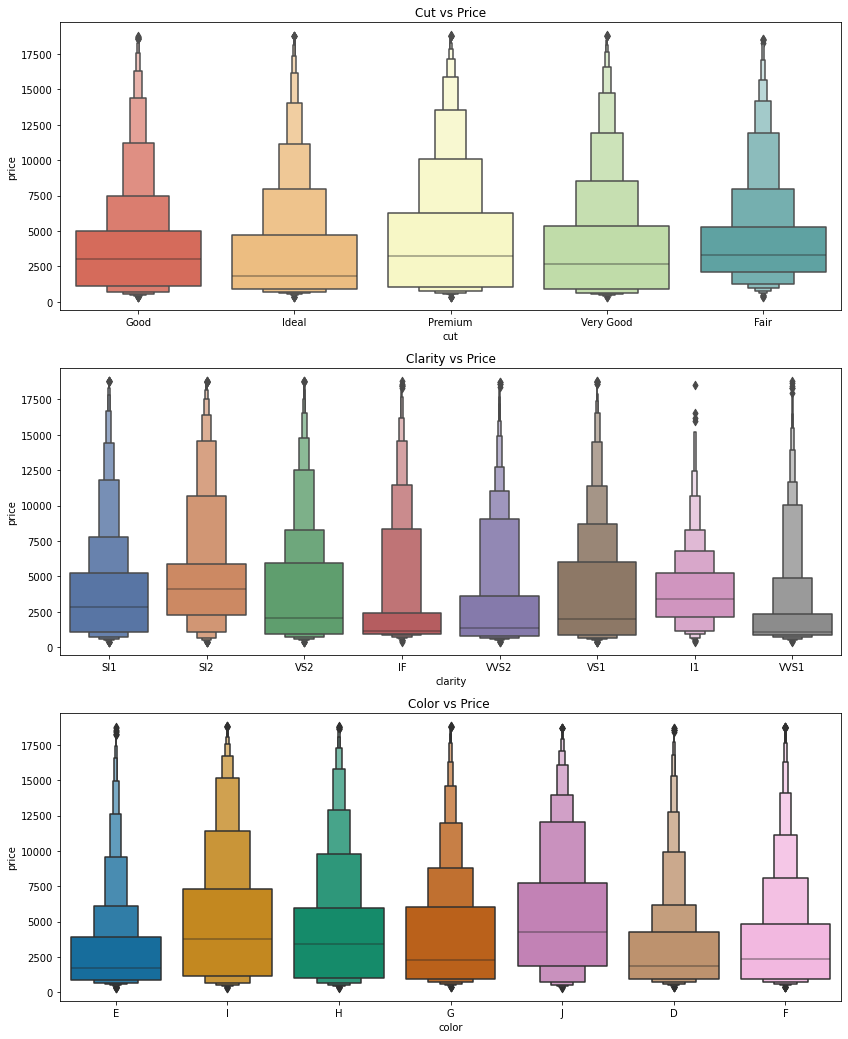

In [52]:
#Plotting boxenplot to try & visualize the data and understand the relation b/w the diamond cut, clarity & color
fig, ax = plt.subplots(3, figsize = (14,18))

#Violin plot for to compare the diamond cut with its price
sns.boxenplot(x='cut',y='price',data = diamond_df, ax=ax[0],palette="Spectral")
ax[0].set_title("Cut vs Price")

#Violin plot for to compare the diamond clarity with its price
sns.boxenplot(x='clarity',y='price',data = diamond_df, ax=ax[1],palette="deep")
ax[1].set_title("Clarity vs Price")

#Violin plot for to compare the diamond color with its price
sns.boxenplot(x='color',y='price',data = diamond_df, ax=ax[2],palette="colorblind")
ax[2].set_title("Color vs Price ")

#Display the plot
plt.show()

array([[<AxesSubplot:xlabel='depth', ylabel='depth'>,
        <AxesSubplot:xlabel='table', ylabel='depth'>,
        <AxesSubplot:xlabel='x', ylabel='depth'>,
        <AxesSubplot:xlabel='y', ylabel='depth'>,
        <AxesSubplot:xlabel='z', ylabel='depth'>,
        <AxesSubplot:xlabel='price', ylabel='depth'>],
       [<AxesSubplot:xlabel='depth', ylabel='table'>,
        <AxesSubplot:xlabel='table', ylabel='table'>,
        <AxesSubplot:xlabel='x', ylabel='table'>,
        <AxesSubplot:xlabel='y', ylabel='table'>,
        <AxesSubplot:xlabel='z', ylabel='table'>,
        <AxesSubplot:xlabel='price', ylabel='table'>],
       [<AxesSubplot:xlabel='depth', ylabel='x'>,
        <AxesSubplot:xlabel='table', ylabel='x'>,
        <AxesSubplot:xlabel='x', ylabel='x'>,
        <AxesSubplot:xlabel='y', ylabel='x'>,
        <AxesSubplot:xlabel='z', ylabel='x'>,
        <AxesSubplot:xlabel='price', ylabel='x'>],
       [<AxesSubplot:xlabel='depth', ylabel='y'>,
        <AxesSubplot:xlabel='table'

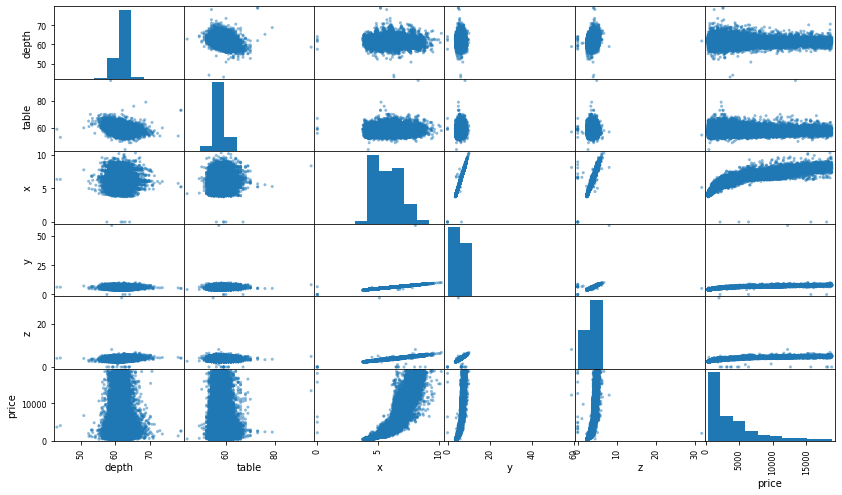

In [53]:
#Plot a scatter matrix for few attriburtes of the diamond dataset like depth, table, price etc.
from pandas.plotting import scatter_matrix

#Define the list of attributes
Attributes = ["depth","table","x","y","z","price"]

#Plot the matrix
scatter_matrix(diamond_df[Attributes], figsize=(14, 8))

In [54]:
#Prepare the data for the ML Algorithms
diamond_df = train_dataset.drop("price", axis=1)

#Make a copy of the diamond prices in the training dataset
label_diamonds = train_dataset["price"].copy()

#Drop all the categorical variables from the dataframe
diamond_df_num = diamond_df.drop(["cut","clarity","color"],axis=1)

#Display the data to check see what the new dataframe contains
diamond_df_num.head()

,carat,depth,table,x,y,z
5906,0.90,60.8,65.0,6.14,6.17,3.74
8859,1.13,61.4,56.0,6.69,6.71,4.12
50784,0.76,61.3,59.0,5.85,5.83,3.58
53587,0.80,62.0,59.0,5.91,5.96,3.68
24965,2.02,63.0,60.0,7.85,7.79,4.93


In [55]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

#Standardize the data values
standard_scaler = StandardScaler()
diamond_scaled_count = standard_scaler.fit_transform(diamond_df_num)

#Display the diamond scaled count
diamond_scaled_count

array([[ 2.15235199e-01, -6.65982809e-01,  3.38140637e+00,
         3.64339218e-01,  3.81366551e-01,  2.83428981e-01],
       [ 7.00519195e-01, -2.47311727e-01, -6.50121933e-01,
         8.54789578e-01,  8.54242452e-01,  8.20301156e-01],
       [-8.01550596e-02, -3.17090241e-01,  6.93720836e-01,
         1.05738119e-01,  8.36298718e-02,  5.73775392e-02],
       ...,
       [-5.65439056e-01,  1.14825855e+00, -1.09806952e+00,
        -5.54140548e-01, -4.41787797e-01, -3.66468914e-01],
       [-2.06750885e-01,  1.00870152e+00, -1.09806952e+00,
        -1.35028422e-01, -9.15093510e-02,  8.64678720e-04],
       [ 4.47327545e-01,  7.99365978e-01,  2.45773246e-01,
         5.33767524e-01,  5.65262734e-01,  6.50762574e-01]])

In [56]:
#Conver the scaled data into a panda dataframe
pd.DataFrame(diamond_scaled_count).head()

,0,1,2,3,4,5
0,0.215235,-0.665983,3.381406,0.364339,0.381367,0.283429
1,0.700519,-0.247312,-0.650122,0.854790,0.854242,0.820301
2,-0.080155,-0.317090,0.693721,0.105738,0.083630,0.057378
3,0.004242,0.171359,0.693721,0.159242,0.197470,0.198660
4,2.578357,0.869144,1.141668,1.889194,1.799994,1.964687


In [57]:
#Encode all the categorical attributes, since ML algorithms work better with numerical values.
#Store all the categorical attributes into a dataframe.
diamond_categories = diamond_df[["cut","color","clarity"]]

#Display the dataframe with categorical values.
print("Categories of Diamond")
print(diamond_categories.head(),"\n")

#Use the sklearn OneHotEncoder to convert the categorical values into numerical values
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
diamond_categories_encoded = encoder.fit_transform(diamond_categories)

print("Encoded Matrix")
#Convert the encoded values into a matrix
print(diamond_categories_encoded.toarray())

encoder.categories_

Categories of Diamond
           cut color clarity
5906      Good     E     SI1
8859     Ideal     I     SI2
50784  Premium     E     SI2
53587  Premium     H     SI1
24965  Premium     H     SI1 

Encoded Matrix
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

In [58]:
#Transformation Pipeline
from sklearn.compose import ColumnTransformer


numrical_attributes = list(diamond_df_num)
category_attributes = ["cut","color","clarity"]
transformation_pipeline = ColumnTransformer([
    ("num", StandardScaler(),numrical_attributes),
    ("cat",OneHotEncoder(),category_attributes),
])


#Transferred data
diamonds_transferred = transformation_pipeline.fit_transform(diamond_df)

diamonds_transferred

array([[ 0.2152352 , -0.66598281,  3.38140637, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.70051919, -0.24731173, -0.65012193, ...,  0.        ,
         0.        ,  0.        ],
       [-0.08015506, -0.31709024,  0.69372084, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.56543906,  1.14825855, -1.09806952, ...,  1.        ,
         0.        ,  0.        ],
       [-0.20675088,  1.00870152, -1.09806952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.44732754,  0.79936598,  0.24577325, ...,  0.        ,
         0.        ,  0.        ]])

In [59]:
pd.DataFrame(diamonds_transferred).head()

diamonds_transferred.shape

(43152, 26)

In [60]:
#Applying ML Algorithms on the Dataset
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from random import randint
from sklearn import metrics

X_test = train_dataset.drop("price",axis=1)
y_test = train_dataset["price"].copy()

model_name = []
rmse_train_scores = []
cv_rmse_scores = []
accuracy_model = []
rmse_test_scores = []
rsquare_score = []
AdjustedR_score = []

def model_performance(modelname,model,diamond_df = diamonds_transferred, label_diamonds = label_diamonds,
                      X_test = X_test,y_test = y_test,
                      pipeline=transformation_pipeline, cv = True):
    
    model_name.append(modelname)
    
    model.fit(diamond_df,label_diamonds)
    
    predictions = model.predict(diamond_df)
    mse_train_score = mean_squared_error(label_diamonds, predictions)
    rmse_train_score = np.sqrt(mse_train_score)
    cv_rmse = np.sqrt(-cross_val_score(model,diamond_df,label_diamonds,
                                       scoring = "neg_mean_squared_error",cv=10))
    cv_rmse_mean = cv_rmse.mean()
   
    
    print("---------------------TRAIN-------------------")
    
    print("RMSE_Train: %.4f" %rmse_train_score)
    rmse_train_scores.append(rmse_train_score)
    print("CV_RMSE: %.4f" %cv_rmse_mean)
    cv_rmse_scores.append(cv_rmse_mean)
    
    print("---------------------TEST-------------------")
    
    X_test_prepared = pipeline.transform(X_test)
    
    test_predictions = model.predict(X_test_prepared)
    mse_score = mean_squared_error(y_test,test_predictions)
    rmse_score = np.sqrt(mse_score)
    R_square = metrics.r2_score(y_test,predictions)
    AdjustedR = (1 - (1-metrics.r2_score(y_test, predictions))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
    
    print("RMSE_Test: %.4f" %rmse_score)
    rmse_test_scores.append(rmse_score)
    
    print("R^2: %.4f" %R_square)
    rsquare_score.append(R_square)
    
    
    print("Adjusted R^2: %.4f" %AdjustedR)
    AdjustedR_score.append(AdjustedR)
    
    accuracy = (model.score(X_test_prepared,y_test)*100)
    print("accuracy: "+ str(accuracy) + "%")
    accuracy_model.append(accuracy)
    
    start = randint(1, len(y_test))
    some_data = X_test.iloc[start:start + 5]
    some_labels = y_test.iloc[start:start + 5]
    some_data_prepared = pipeline.transform(some_data)
    print("Predictions:", model.predict(some_data_prepared))
    print("Labels:    :", list(some_labels))
    
    
    plt.scatter(y_test,test_predictions, color='g')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    x_lim = plt.xlim()
    y_lim = plt.ylim()
    plt.plot(x_lim, y_lim, "go--", color='r')
    
    plt.show()

Linear Regression

C:\Users\sgurra2\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\sgurra2\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

mod

---------------------TRAIN-------------------
RMSE_Train: 1120.4349
CV_RMSE: 1126.2289
---------------------TEST-------------------
RMSE_Test: 1120.4349
R^2: 0.9206
Adjusted R^2: 0.9205
accuracy: 92.05632682855044%
Predictions: [4205.875 1079.75  3625.375 7455.    4902.375]
Labels:    : [4354.0, 1920.0, 3704.0, 8061.0, 5458.0]


C:\Users\sgurra2\AppData\Local\Temp/ipykernel_18276/1947749530.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_lim, y_lim, "go--", color='r')


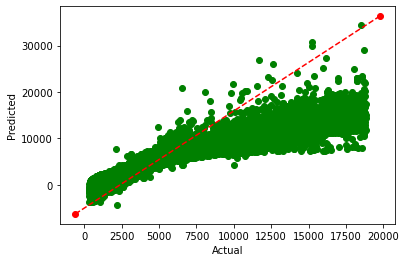

In [61]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression(normalize=True)
model_performance("Linear Regression",linear_regression)

Decision Trees

---------------------TRAIN-------------------
RMSE_Train: 9.2835
CV_RMSE: 750.1795
---------------------TEST-------------------
RMSE_Test: 9.2835
R^2: 1.0000
Adjusted R^2: 1.0000
accuracy: 99.99945465862059%
Predictions: [ 1958.  1391.  2040.  5292. 12271.]
Labels:    : [1958.0, 1391.0, 2040.0, 5292.0, 12271.0]


C:\Users\sgurra2\AppData\Local\Temp/ipykernel_18276/1947749530.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_lim, y_lim, "go--", color='r')


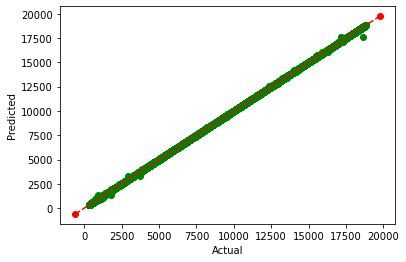

In [62]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(random_state=42)
model_performance("Decision Tree Regression",decision_tree)

Random Forest

---------------------TRAIN-------------------
RMSE_Train: 240.8958
CV_RMSE: 577.7402
---------------------TEST-------------------
RMSE_Test: 240.8958
R^2: 0.9963
Adjusted R^2: 0.9963
accuracy: 99.63279664536154%
Predictions: [4497.1 6171.4 1043.5  748.   534.6]
Labels:    : [4186.0, 6449.0, 1049.0, 755.0, 545.0]


C:\Users\sgurra2\AppData\Local\Temp/ipykernel_18276/1947749530.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_lim, y_lim, "go--", color='r')


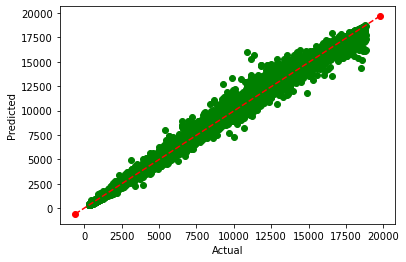

In [63]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 42)
model_performance("Random Forest Regression",random_forest_reg)

AdaBoost

---------------------TRAIN-------------------
RMSE_Train: 1408.5579
CV_RMSE: 1516.4238
---------------------TEST-------------------
RMSE_Test: 1408.5579
R^2: 0.8745
Adjusted R^2: 0.8744
accuracy: 87.44555311065851%
Predictions: [13455.38843202  1615.20887372  4268.21371769  7429.5886754
  1122.42757774]
Labels:    : [15219.0, 1035.0, 3084.0, 6468.0, 645.0]


/var/folders/n5/7mr6_6mx2ps0qx7bzh7yzy7r0000gn/T/ipykernel_1047/1947749530.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_lim, y_lim, "go--", color='r')


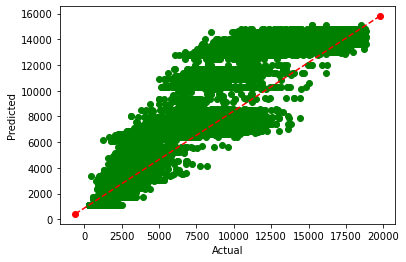

In [156]:
from sklearn.ensemble import AdaBoostRegressor

ada_boost_reg = AdaBoostRegressor(n_estimators = 100)
model_performance("Ada Boost Regression",ada_boost_reg)

Gradient Boosting

---------------------TRAIN-------------------
RMSE_Train: 1228.6672
CV_RMSE: 1235.8964
---------------------TEST-------------------
RMSE_Test: 1228.6672
R^2: 0.9045
Adjusted R^2: 0.9045
accuracy: 90.44750856555217%
Predictions: [ 4844.6543744   1712.91349472   907.19895406  1076.10072824
 10395.84405375]
Labels:    : [4061.0, 2243.0, 720.0, 805.0, 8529.0]


/var/folders/n5/7mr6_6mx2ps0qx7bzh7yzy7r0000gn/T/ipykernel_1047/1947749530.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_lim, y_lim, "go--", color='r')


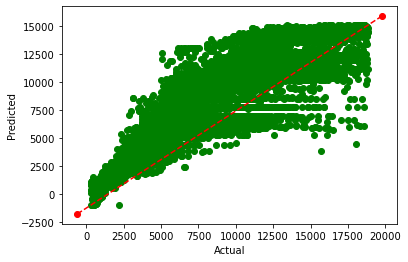

In [157]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_reg = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1,
                                     max_depth = 1, random_state = 42, loss = 'ls')
model_performance("Gradient Boosting Regression",gradient_boosting_reg)

Compare all the models

In [158]:
comparing_models = pd.DataFrame({"Algorithms" : model_name, "Models RMSE" : rmse_test_scores, 
                               "CV RMSE Mean" : cv_rmse_scores, "Accuracy" : accuracy_model})
comparing_models.sort_values(by = "Accuracy", ascending=False)

,Algorithms,Models RMSE,CV RMSE Mean,Accuracy
1,Decision Tree Regression,9.283466,750.179507,99.999455
2,Random Forest Regression,240.895810,577.740208,99.632797
0,Linear Regression,1120.392680,1126.210723,92.056925
4,Gradient Boosting Regression,1228.667173,1235.896393,90.447509
3,Ada Boost Regression,1408.557948,1516.423825,87.445553


/Users/nidhimasur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Accuracy', ylabel='Algorithms'>

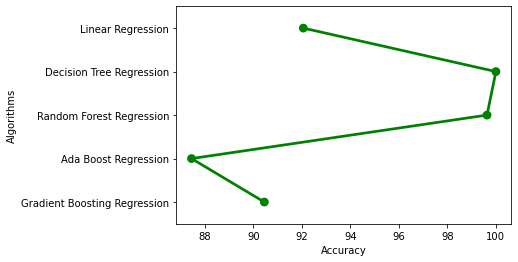

In [159]:
sns.pointplot("Accuracy","Algorithms",data=pd.DataFrame({'Algorithms':model_name,"Accuracy":accuracy_model}),color='g')
